In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import spatial

In [3]:
x1_1 = np.array([random.randint(1,100)/10 for _ in range(100)])
x1_1

array([7. , 5. , 3.1, 8.8, 1. , 1.9, 3.8, 7. , 9.3, 0.4, 9.7, 9.1, 3.9,
       6.9, 6.8, 1.6, 3.1, 9.9, 4.4, 1.2, 1.5, 6.3, 6.4, 9.6, 5. , 6.8,
       8.5, 5.9, 3.8, 0.9, 1.1, 6.3, 9.5, 4.5, 1.3, 8.8, 3. , 2.3, 8.8,
       3.2, 9. , 9.1, 0.3, 9.8, 8.3, 4.1, 6.8, 8.6, 6.7, 5.3, 3.5, 7.3,
       2.8, 8.1, 9.1, 4.5, 5.5, 4.8, 4.9, 7.2, 2.9, 1. , 2.9, 0.3, 7.5,
       5.6, 4.4, 0.6, 4. , 1.6, 1.8, 4. , 1.3, 3.4, 4.8, 6.5, 4. , 2.7,
       7.7, 1.2, 0.4, 2.1, 0.5, 3.5, 3. , 2. , 9.8, 7.7, 1.6, 6. , 4.4,
       6.7, 8.3, 4.8, 8.4, 8.4, 8.7, 5.6, 4.1, 2.6])

In [19]:
x1 = np.round(np.array(list(map(lambda x: (1 - np.cos(x**3))/x,x1_1.tolist())))*10)+1
x1

array([ 4.,  1.,  4.,  3.,  6.,  2.,  4.,  4.,  1.,  1.,  2.,  1.,  6.,
        3.,  1., 11.,  4.,  3.,  5., 11., 14.,  2.,  3.,  2.,  1.,  1.,
        2.,  3.,  4.,  4.,  8.,  2.,  3.,  5., 13.,  3.,  5.,  1.,  3.,
        3.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  4.,  3.,  1.,
        8.,  3.,  1.,  5.,  5.,  5.,  3.,  4.,  2.,  6.,  2.,  1.,  2.,
        1.,  5.,  1.,  3., 11.,  2.,  3., 13.,  4.,  5.,  3.,  3.,  2.,
        3., 11.,  1., 10.,  1.,  3.,  5.,  7.,  2.,  3., 11.,  4.,  5.,
        1.,  1.,  5.,  3.,  3.,  2.,  1.,  1.,  4.])

In [20]:
x2 = np.round(np.array(list(map(lambda x: abs(np.sin(x))/x,x1_1.tolist())))*10+4)+1
x2

array([ 6.,  7.,  5.,  6., 13., 10.,  7.,  6.,  5., 15.,  5.,  5.,  7.,
        6.,  6., 11.,  5.,  5.,  7., 13., 12.,  5.,  5.,  5.,  7.,  6.,
        6.,  6.,  7., 14., 13.,  5.,  5.,  7., 12.,  6.,  5.,  8.,  6.,
        5.,  5.,  5., 15.,  5.,  6.,  7.,  6.,  6.,  6.,  7.,  6.,  6.,
        6.,  6.,  5.,  7.,  6.,  7.,  7.,  6.,  6., 13.,  6., 15.,  6.,
        6.,  7., 14.,  7., 11., 10.,  7., 12.,  6.,  7.,  5.,  7.,  7.,
        6., 13., 15.,  9., 15.,  6.,  5., 10.,  5.,  6., 11.,  5.,  7.,
        6.,  6.,  7.,  6.,  6.,  6.,  6.,  7.,  7.])

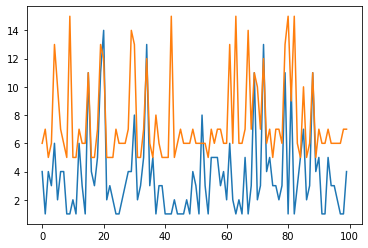

In [21]:
plt.plot(np.transpose([x1,x2]))
plt.show()

In [50]:
x3 = x1 + np.random.rand(100)
x4 =  x1 + np.random.rand(100)
x5 = x1 + np.random.rand(100)
x6 =  x2 + np.random.rand(100)

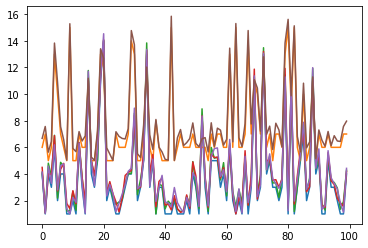

In [51]:
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.plot(x4)
plt.plot(x5)
plt.plot(x6)
plt.show()

In [52]:
X = np.column_stack([x1,x2,x3,x4,x5,x6])

In [53]:
def wij(xi,xj):
    return np.exp(-np.linalg.norm(xi - xj)**2)

In [54]:
np.transpose(X)

array([[ 4.        ,  1.        ,  4.        ,  3.        ,  6.        ,
         2.        ,  4.        ,  4.        ,  1.        ,  1.        ,
         2.        ,  1.        ,  6.        ,  3.        ,  1.        ,
        11.        ,  4.        ,  3.        ,  5.        , 11.        ,
        14.        ,  2.        ,  3.        ,  2.        ,  1.        ,
         1.        ,  2.        ,  3.        ,  4.        ,  4.        ,
         8.        ,  2.        ,  3.        ,  5.        , 13.        ,
         3.        ,  5.        ,  1.        ,  3.        ,  3.        ,
         1.        ,  1.        ,  1.        ,  2.        ,  1.        ,
         1.        ,  1.        ,  2.        ,  1.        ,  4.        ,
         3.        ,  1.        ,  8.        ,  3.        ,  1.        ,
         5.        ,  5.        ,  5.        ,  3.        ,  4.        ,
         2.        ,  6.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  5.        ,  1.        ,  3. 

In [55]:
from itertools import product

In [59]:
W = np.array([wij(x[0],x[1]) for x in product(np.transpose(X),np.transpose(X))]).reshape(6,6)
Q = np.identity(6) * W.sum(axis=0)
L = Q - W
L

array([[ 5.90638649e-14,  0.00000000e+00, -5.64154201e-14,
        -2.14180359e-16, -2.40892744e-15,  0.00000000e+00],
       [ 0.00000000e+00,  4.44089210e-15,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.53236624e-15],
       [-5.64154201e-14,  0.00000000e+00,  1.39411781e-07,
        -1.10156996e-07, -2.92547281e-08,  0.00000000e+00],
       [-2.14180359e-16,  0.00000000e+00, -1.10156996e-07,
         1.40953890e-07, -3.07968930e-08,  0.00000000e+00],
       [-2.40892744e-15,  0.00000000e+00, -2.92547281e-08,
        -3.07968930e-08,  6.00516235e-08,  0.00000000e+00],
       [ 0.00000000e+00, -4.53236624e-15,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.44089210e-15]])

In [57]:
W

array([[1.00000000e+00, 0.00000000e+00, 5.64154201e-14, 2.14180359e-16,
        2.40892744e-15, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.53236624e-15],
       [5.64154201e-14, 0.00000000e+00, 1.00000000e+00, 1.10156996e-07,
        2.92547281e-08, 0.00000000e+00],
       [2.14180359e-16, 0.00000000e+00, 1.10156996e-07, 1.00000000e+00,
        3.07968930e-08, 0.00000000e+00],
       [2.40892744e-15, 0.00000000e+00, 2.92547281e-08, 3.07968930e-08,
        1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.53236624e-15, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00]])